## LAB 1 Metrics of the UX in MVT Test

__Churn Prediction__
Retention Rate is one of the most critical metrics.Retention Rate is a performance (metrics) indication of how good is your product market fit (PMF). If your PMF is not satisfactory, you should see your customers churning very soon. Can there be powerful tools to seek out feature to improve Retention Rate (hence the PMF).

Here is a Telco dataset and go over the following steps to develop a Churn Prediction MVT model:
- Exploratory data analysis
- Feature engineering
- Investigating how the features affect Retention by using Logistic Regression
- Building a classification model with XGBoost

In [1]:
from datetime import datetime, timedelta,date
import pandas as pd
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
#import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split

ModuleNotFoundError: No module named 'xgboost'

In [2]:
df_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

__Exploratory Data Analysis__

In [4]:
df_data.loc[df_data.Churn=='No','Churn'] = 0 
df_data.loc[df_data.Churn=='Yes','Churn'] = 1

In [5]:
df_data.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [6]:
df_plot = df_data.groupby('gender').Churn.mean().reset_index()
df_plot

,gender,Churn
0,Female,0.269209
1,Male,0.261603


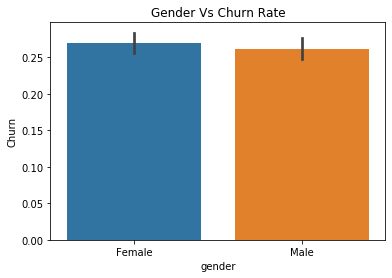

In [7]:
sns.barplot(x='gender',y='Churn',data=df_data)
plt.title("Gender Vs Churn Rate")
plt.xticks((0,1),("Female","Male"))
plt.show()

In [8]:
df_plot = df_data.groupby('InternetService').Churn.mean().reset_index()
df_plot

,InternetService,Churn
0,DSL,0.189591
1,Fiber optic,0.418928
2,No,0.074050


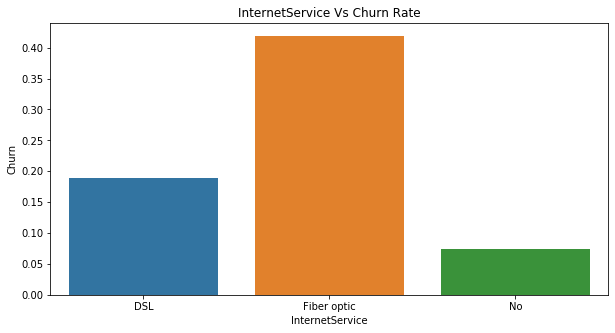

In [9]:
plt.figure(figsize=(10,5))
sns.barplot(x='InternetService',y='Churn',data=df_plot)
plt.title("InternetService Vs Churn Rate")
plt.show()

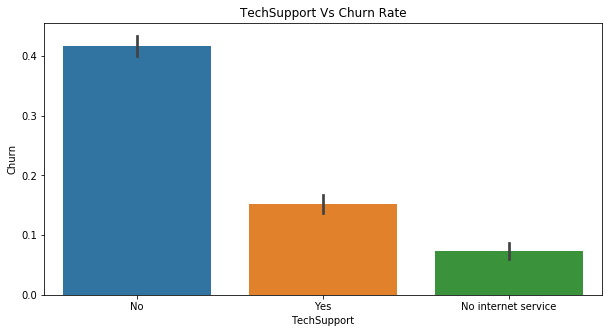

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(x='TechSupport',y='Churn',data=df_data)
plt.title("TechSupport Vs Churn Rate")
plt.show()

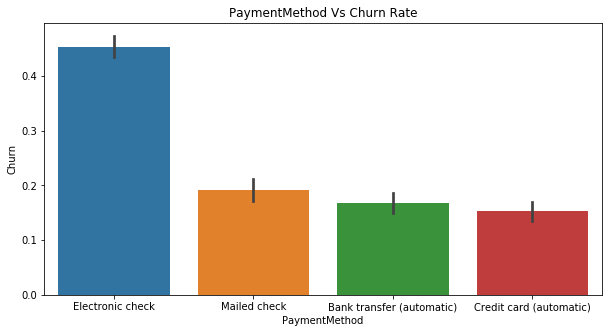

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(x='PaymentMethod',y='Churn',data=df_data)
plt.title("PaymentMethod Vs Churn Rate")
plt.show()

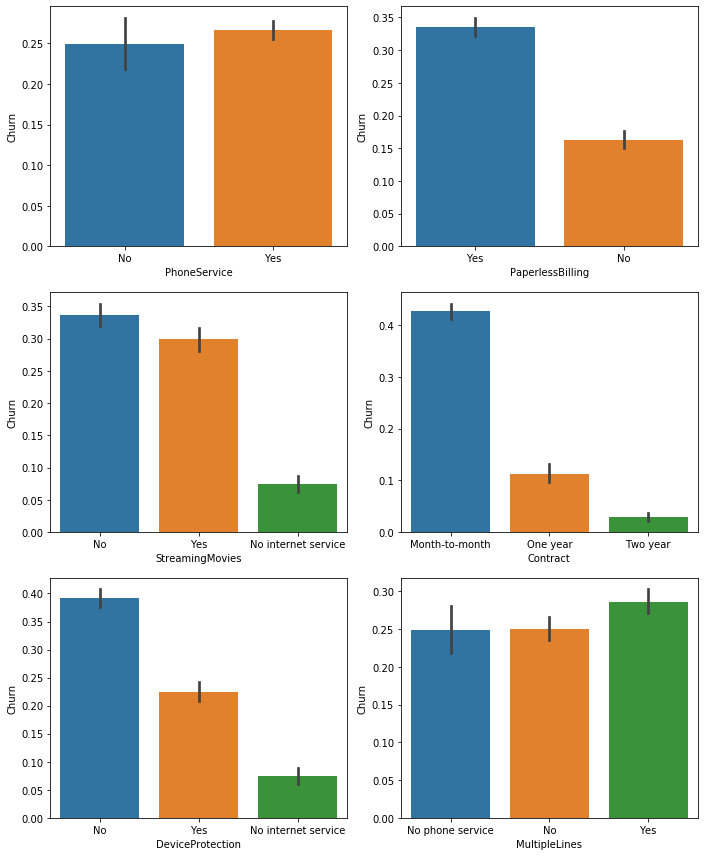

In [12]:
fig = plt.figure(figsize=(10,12))
labels2 = ['PhoneService','PaperlessBilling','StreamingMovies','Contract','DeviceProtection','MultipleLines']  
for i in range(0,6):
    ax = fig.add_subplot(3,2,i+1)
    plt.tight_layout()
    sns.barplot(x=labels2[i],y='Churn',data=df_data)
plt.show()

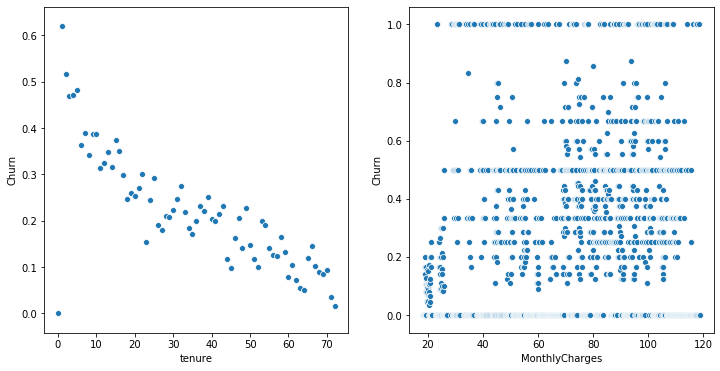

In [13]:
fig = plt.figure(figsize=(12,6))
labels2 = ['tenure','MonthlyCharges']  
for i in range(0,2):
    ax = fig.add_subplot(1,2,i+1)
    #plt.tight_layout()
    df_plot = df_data.groupby(labels2[i]).Churn.mean().reset_index()
    sns.scatterplot(x=labels2[i],y='Churn',data=df_plot)
plt.show()

In [14]:
#df_plot = df_data.groupby('TotalCharges').Churn.mean().reset_index()

In [15]:
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

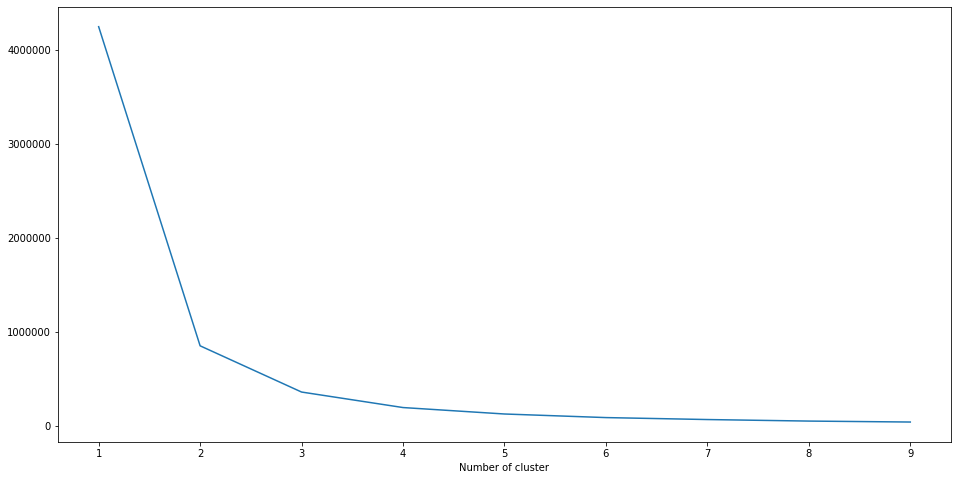

In [16]:
sse={}
pd.options.mode.chained_assignment = None
df_cluster = df_data[['tenure']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_cluster)
    df_cluster["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure(figsize=(16,8))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [17]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_data[['tenure']])
df_data['TenureCluster'] = kmeans.predict(df_data[['tenure']])

In [18]:
df_data = order_cluster('TenureCluster', 'tenure',df_data,True)

In [19]:
df_data.groupby('TenureCluster').tenure.describe()

,count,mean,std,min,25%,50%,75%,max
TenureCluster,,,,,,,,
0,2878.0,7.512509,5.977337,0.0,2.0,6.0,12.0,20.0
1,1926.0,33.854102,8.208706,21.0,26.0,34.0,41.0,48.0
2,2239.0,63.048682,7.478229,49.0,56.0,64.0,70.0,72.0


In [20]:
df_data['TenureCluster'] = df_data["TenureCluster"].replace({0:'Low',1:'Mid',2:'High'})

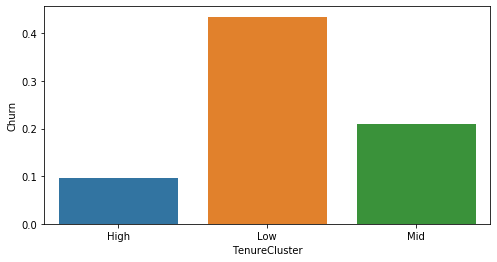

In [21]:
df_plot = df_data.groupby('TenureCluster').Churn.mean().reset_index()
plt.figure(figsize=(8,4))
sns.barplot(x='TenureCluster',y='Churn',data=df_plot)
plt.show()

In [22]:
df_plot = df_data.copy()
df_plot['MonthlyCharges'] = df_plot['MonthlyCharges'].astype(int)
df_plot = df_plot.groupby('MonthlyCharges').Churn.mean().reset_index()

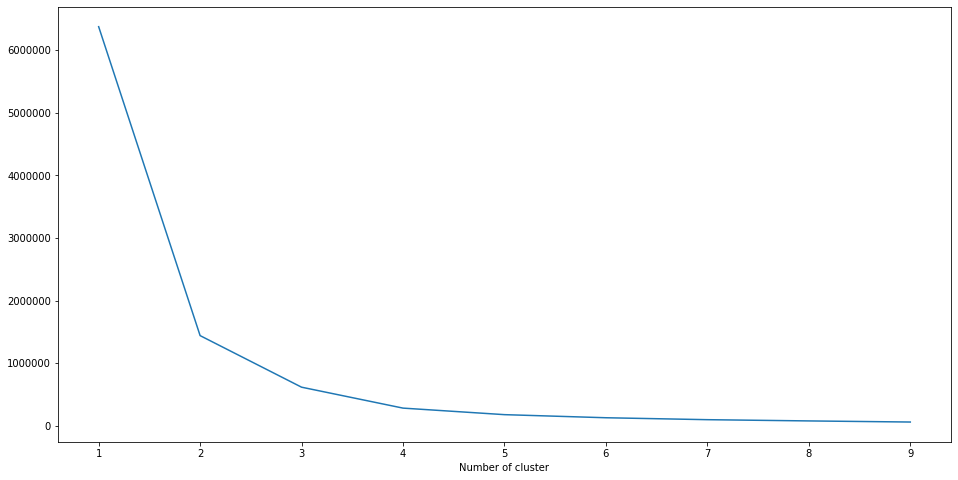

In [23]:
sse={}
df_cluster = df_data[['MonthlyCharges']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_cluster)
    df_cluster["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure(figsize=(16,8))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [24]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_data[['MonthlyCharges']])
df_data['MonthlyChargeCluster'] = kmeans.predict(df_data[['MonthlyCharges']])

In [25]:
df_data = order_cluster('MonthlyChargeCluster', 'MonthlyCharges',df_data,True)

In [26]:
df_data.groupby('MonthlyChargeCluster').MonthlyCharges.describe()

,count,mean,std,min,25%,50%,75%,max
MonthlyChargeCluster,,,,,,,,
0,1892.0,23.384619,5.660437,18.25,19.80,20.40,25.0500,42.40
1,2239.0,61.628808,10.441432,42.60,51.80,61.55,70.7000,77.80
2,2912.0,94.054258,10.343944,77.85,85.05,93.90,101.9125,118.75


In [27]:
df_data['MonthlyChargeCluster'] = df_data["MonthlyChargeCluster"].replace({0:'Low',1:'Mid',2:'High'})

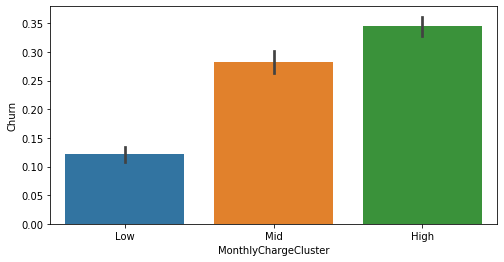

In [28]:
plt.figure(figsize=(8,4))
sns.barplot(x='MonthlyChargeCluster',y='Churn',data=df_data)
plt.show()

In [29]:
df_data[pd.to_numeric(df_data['TotalCharges'], errors='coerce').isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureCluster,MonthlyChargeCluster
91,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.25,,0,Low,Low
136,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.75,,0,Low,Low
416,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,19.85,,0,Low,Low
478,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.35,,0,Low,Low
556,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.00,,0,Low,Low
668,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0,Low,Low
1976,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0,Low,Mid
2114,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,No,Two year,No,Credit card (automatic),56.05,,0,Low,Mid
2995,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,No,Two year,No,Mailed check,73.35,,0,Low,Mid
3008,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,No,Two year,Yes,Bank transfer (automatic),61.90,,0,Low,Mid


In [30]:
len(df_data[pd.to_numeric(df_data['TotalCharges'], errors='coerce').isnull()])

11

In [31]:
df_data.loc[pd.to_numeric(df_data['TotalCharges'], errors='coerce').isnull(),'TotalCharges'] = np.nan

In [32]:
df_data = df_data.dropna()

In [33]:
df_data['TotalCharges'] = pd.to_numeric(df_data['TotalCharges'], errors='coerce')

In [34]:
df_plot = df_data.copy()
df_plot['TotalCharges'] = df_plot['TotalCharges'].astype(int)

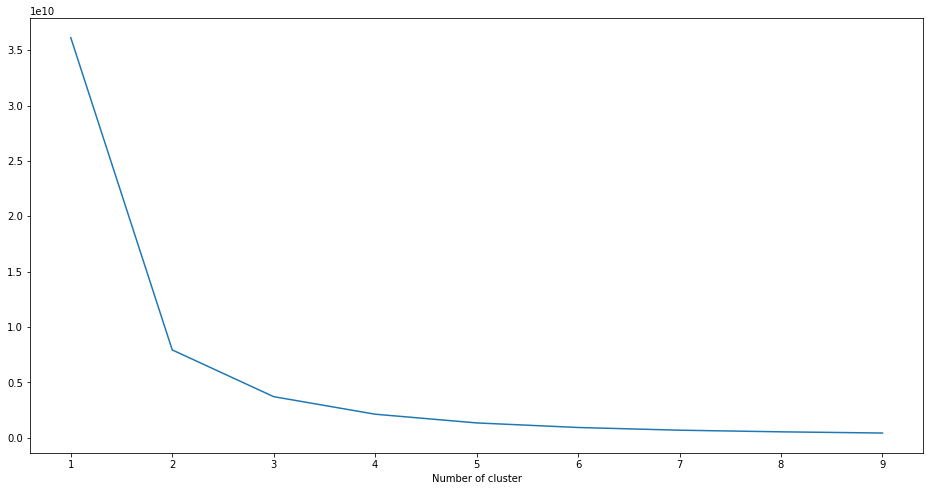

In [35]:
sse={}
df_cluster = df_data[['TotalCharges']]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_cluster)
    df_cluster["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 
plt.figure(figsize=(16,8))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.show()

In [36]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_data[['TotalCharges']])
df_data['TotalChargeCluster'] = kmeans.predict(df_data[['TotalCharges']])

In [37]:
df_data = order_cluster('TotalChargeCluster', 'TotalCharges',df_data,True)

In [38]:
df_data.groupby('TotalChargeCluster').TotalCharges.describe()

,count,mean,std,min,25%,50%,75%,max
TotalChargeCluster,,,,,,,,
0,4160.0,686.204087,572.025502,18.80,161.4875,535.95,1139.4125,1975.85
1,1613.0,3272.602139,814.144302,1978.65,2548.6500,3211.20,3970.4000,4779.45
2,1259.0,6292.972558,1003.372938,4783.50,5468.7000,6145.85,7040.1500,8684.80


In [39]:
df_data['TotalChargeCluster'] = df_data["TotalChargeCluster"].replace({0:'Low',1:'Mid',2:'High'})

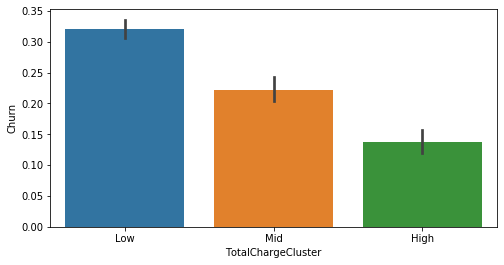

In [40]:
plt.figure(figsize=(8,4))
sns.barplot(x='TotalChargeCluster',y='Churn',data=df_data)
plt.show()

In [41]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 24 columns):
customerID              7032 non-null object
gender                  7032 non-null object
SeniorCitizen           7032 non-null int64
Partner                 7032 non-null object
Dependents              7032 non-null object
tenure                  7032 non-null int64
PhoneService            7032 non-null object
MultipleLines           7032 non-null object
InternetService         7032 non-null object
OnlineSecurity          7032 non-null object
OnlineBackup            7032 non-null object
DeviceProtection        7032 non-null object
TechSupport             7032 non-null object
StreamingTV             7032 non-null object
StreamingMovies         7032 non-null object
Contract                7032 non-null object
PaperlessBilling        7032 non-null object
PaymentMethod           7032 non-null object
MonthlyCharges          7032 non-null float64
TotalCharges            7032 non-null f

In [42]:
#import Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dummy_columns = [] #array for multiple value columns

for column in df_data.columns:
    if df_data[column].dtype == object and column != 'customerID':
        if df_data[column].nunique() == 2:
            #apply Label Encoder for binary ones
            df_data[column] = le.fit_transform(df_data[column]) 
        else:
            dummy_columns.append(column)

#apply get dummies for selected columns
df_data = pd.get_dummies(data = df_data,columns = dummy_columns)

In [43]:
df_data[['gender','Partner','TenureCluster_High','TenureCluster_Low','TenureCluster_Mid']].head()

,gender,Partner,TenureCluster_High,TenureCluster_Low,TenureCluster_Mid
0,0,1,0,1,0
1,0,0,0,1,0
2,1,0,0,1,0
3,1,0,0,1,0
4,1,1,0,1,0


In [44]:
all_columns = []
for column in df_data.columns:
    column = column.replace(" ", "_").replace("(", "_").replace(")", "_").replace("-", "_")
    all_columns.append(column)

df_data.columns = all_columns

In [45]:
glm_columns = 'gender'

for column in df_data.columns:
    if column not in ['Churn','customerID','gender']:
        glm_columns = glm_columns + ' + ' + column

In [46]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
 

glm_model = smf.glm(formula='Churn ~ {}'.format(glm_columns), data=df_data, family=sm.families.Binomial())
res = glm_model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                            GLM   Df Residuals:                     7002
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2900.0
Date:                Wed, 04 Mar 2020   Deviance:                       5800.1
Time:                        13:22:28   Pearson chi2:                 7.58e+03
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [47]:
np.exp(res.params)

Intercept                                  1.277909
gender                                     0.975260
SeniorCitizen                              1.252059
Partner                                    1.003004
Dependents                                 0.874197
tenure                                     0.939221
PhoneService                               1.248875
PaperlessBilling                           1.415368
MonthlyCharges                             0.967115
TotalCharges                               1.000119
MultipleLines_No                           0.889419
MultipleLines_No_phone_service             1.023248
MultipleLines_Yes                          1.404147
InternetService_DSL                        0.550493
InternetService_Fiber_optic                2.822608
InternetService_No                         0.822426
OnlineSecurity_No                          1.382201
OnlineSecurity_No_internet_service         0.822426
OnlineSecurity_Yes                         1.124169
OnlineBackup

In [ ]:
import xgboost as xgb

In [ ]:
#create feature set and labels
X = df_data.drop(['Churn','customerID'],axis=1)
y = df_data.Churn
#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=56)
#building the model
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))
y_pred = xgb_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_model, ax=ax)

In [ ]:
df_data['proba'] = xgb_model.predict_proba(df_data[X_train.columns])[:,1]
df_data[['customerID', 'proba']].head()

### FINISH